<a href="https://colab.research.google.com/github/AlexanderG40/Data-Science/blob/main/Week6_Assignment_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [64]:
#Print the first 5 rows to observe your data
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
# here we find the shape of our data
iris_df.shape

(150, 4)

In [66]:
# describe for the stats of the dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


1. Compute mean, median, and mode for each feature.

In [67]:
# here we print out the mean or average of our data
print(iris_df.mean())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


In [68]:
# next we find the median or the middle value
print(iris_df.median())

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64


In [69]:
# next we find our mode or the most occuring value
# we went over this in class but I also found this interesting
# https://www.geeksforgeeks.org/python-extracting-rows-using-pandas-iloc/
print(iris_df.mode().iloc[0])

sepal length (cm)    5.0
sepal width (cm)     3.0
petal length (cm)    1.4
petal width (cm)     0.2
Name: 0, dtype: float64


2. Calculate the range, variance, and standard deviation for each feature.

In [70]:
# here we print a skew of our data
print(iris_df.skew())
# as we can see we have negative skewness in our graph because length and with are negatives

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64


<Axes: >

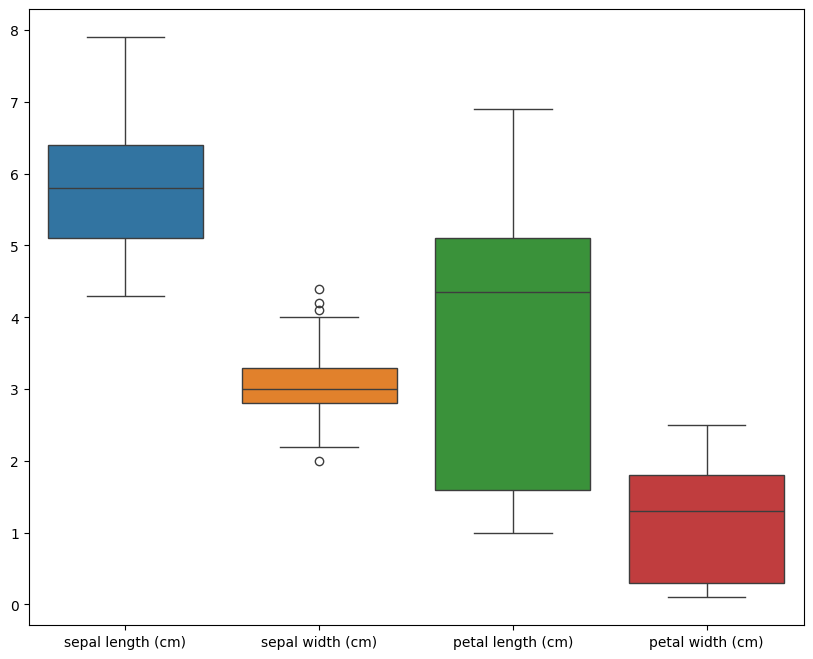

In [71]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=iris_df)

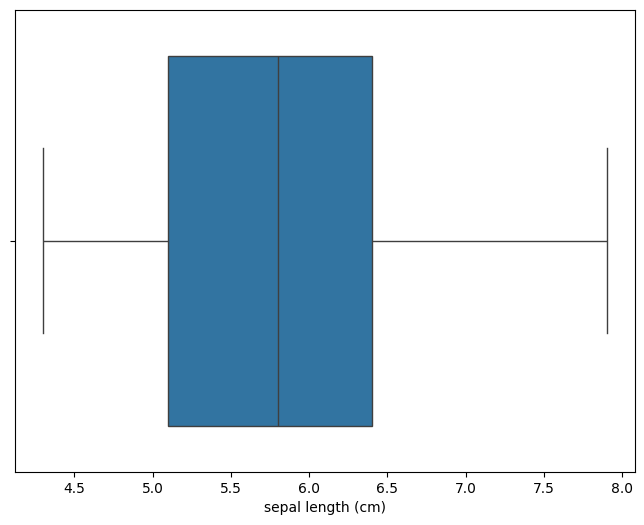

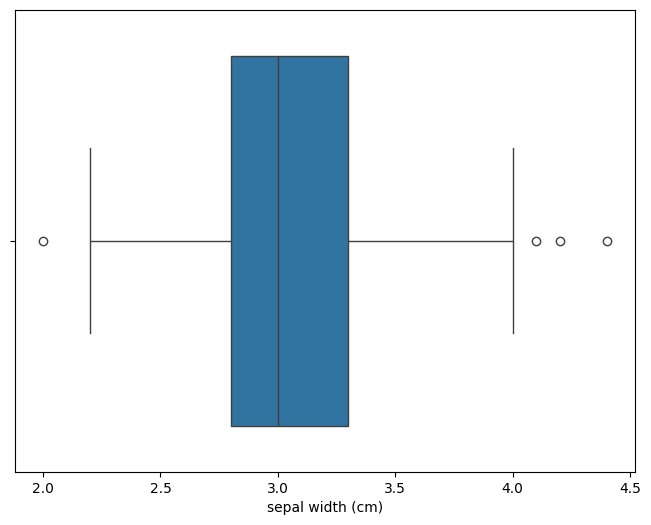

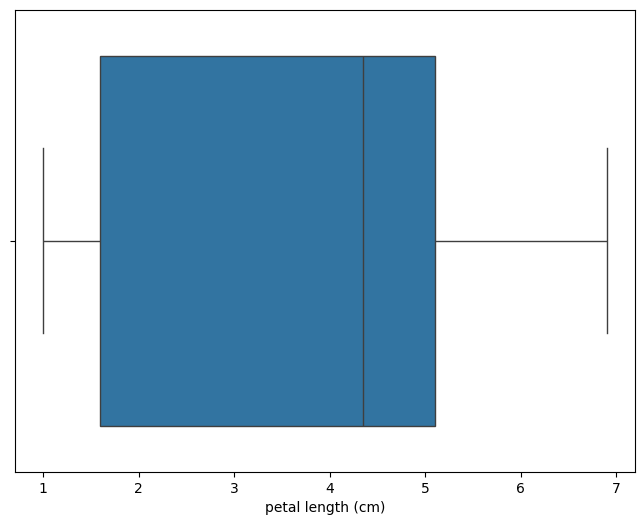

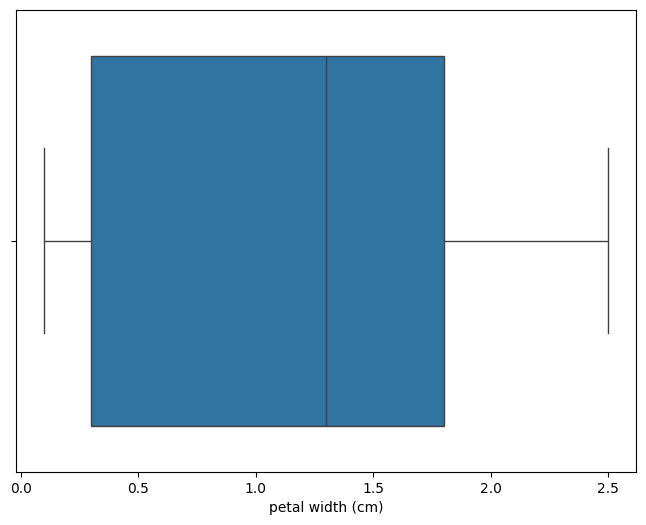

In [72]:
# create a column with all of our data sepal lenght, sepal width, petal length, petal with
for column in iris_df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x = iris_df[column])

In [73]:
# here we finally calculate the range of our dataset
range = iris_df.max() - iris_df.min()
print(range)

sepal length (cm)    3.6
sepal width (cm)     2.4
petal length (cm)    5.9
petal width (cm)     2.4
dtype: float64


3. Compute the 25th, 50th, and 75th percentiles (quartiles) for each feature.

In [74]:
# here we print the quartiles
Q1 = iris_df.quantile(0.25)
Q2 = iris_df.quantile(0.50)
Q3 = iris_df.quantile(0.75)
IQR = Q3 - Q1
# we print the IQR
IQR

,0
sepal length (cm),1.3
sepal width (cm),0.5
petal length (cm),3.5
petal width (cm),1.5


4. Create a histogram for each of the features to visualize their distributions.

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

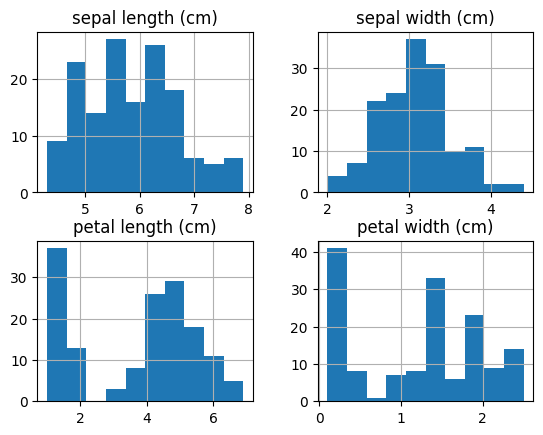

In [75]:
iris_df.hist(bins=10)
# we created a histogram that shows 10 bars = bins

5. Plot scatter plots between pairs of features to explore relationships.

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

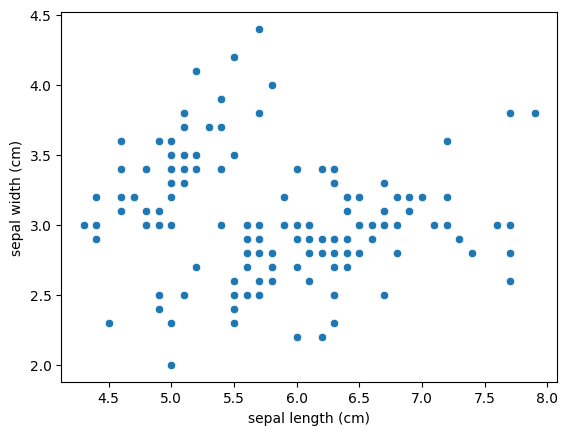

In [76]:
# here we make a scatter plot between the lenght and the width
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)')
# no real relationship it is non linear and all over the place

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

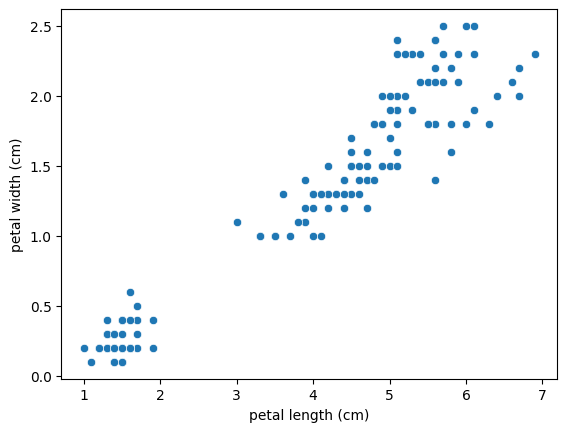

In [77]:
# here we make a scatter plot between the petal length and width
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)')
# we can see that this is a more linear relationship to sepal

<Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>

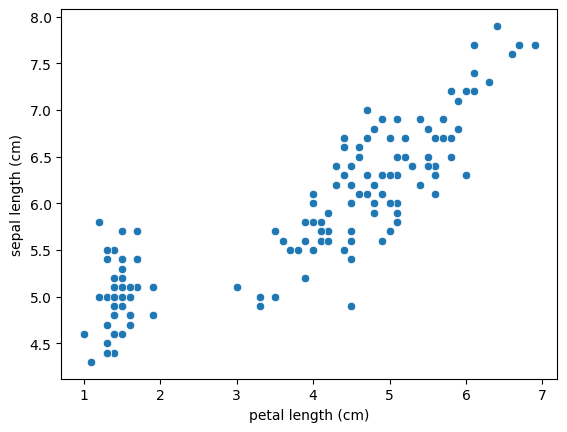

In [78]:
# we make a relationship between petal lenght and sepal length
sns.scatterplot(data=iris_df, x='petal length (cm)', y='sepal length (cm)')
# not really a realtionship they are both in completely different areas

<Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>

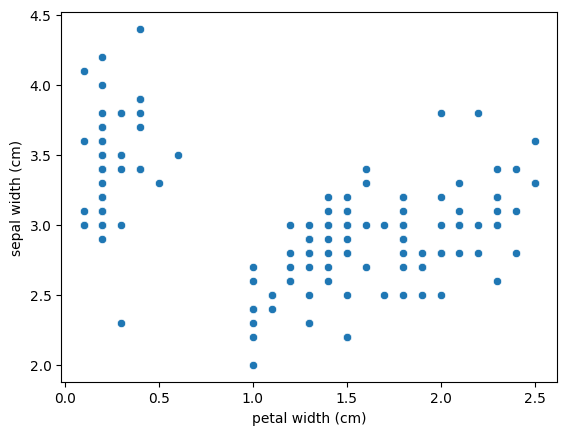

In [79]:
# finally we make a scatterplot between petal width and sepal width
sns.scatterplot(data=iris_df, x='petal width (cm)', y='sepal width (cm)')
# no realationship they are non linear and no correlation

In [80]:
# we start doing our statistical analysis
# import library our libraries again just to make sure they are all up and running
# researched how to do t-tests : https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# here we load the dataset again
from sklearn.datasets import load_iris
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Map target values to species names
species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species'] = iris_df['species'].map(species_names)

# Now you can access the species column
setosa = iris_df[iris_df['species'] == 'setosa']['sepal length (cm)']
versicolor = iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)']
virginica = iris_df[iris_df['species'] == 'virginica']['sepal length (cm)']

i1 = stats.ttest_ind(setosa, versicolor)
i2 = stats.ttest_ind(versicolor, virginica)
i3 = stats.ttest_ind(virginica, setosa)

print("T-Tests")
print("Setosa vs Versicolor:", i1)
print("Versicolor vs Virginica:", i2)
print("Virginica vs Setosa:", i3)

T-Tests
Setosa vs Versicolor: TtestResult(statistic=np.float64(-10.52098626754911), pvalue=np.float64(8.985235037487079e-18), df=np.float64(98.0))
Versicolor vs Virginica: TtestResult(statistic=np.float64(-5.629165259719801), pvalue=np.float64(1.7248563024547942e-07), df=np.float64(98.0))
Virginica vs Setosa: TtestResult(statistic=np.float64(15.386195820079404), pvalue=np.float64(6.892546060674059e-28), df=np.float64(98.0))


In [82]:
# we calculate the 95% confidence interval for the setosa species petal length
# https://www.geeksforgeeks.org/how-to-calculate-confidence-intervals-in-python/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html
ps = iris_df[iris_df['species'] == 'setosa']['petal length (cm)']
# we calculate the mean of the petal length
setosa_mean = np.mean(ps)
# we calculate the standard error of the mean SEM:
setosa_SEM = stats.sem(ps)
# we finally calcualte the 95% confidence interval
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
confidence_interval = stats.t.interval(0.95, len(ps)-1, loc=setosa_mean, scale=setosa_SEM)
print(confidence_interval)

(np.float64(1.4126452382875103), np.float64(1.51135476171249))
